In [31]:
# Import helpful packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

# Matplotlib setting for Jupyter Notebook
%matplotlib inline
plt.style.use('ggplot')

###scikit Learn Modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# Configuration
input = "/Users/danielambach/Library/CloudStorage/OneDrive-DBUDigitalBusinessUniversityofAppliedSciencesGmbH/DBU/07_Machine Learning/20 Daten/"
INPUT_FILE = os.path.join(input, "hotel_bookings.csv")
PROFILE_FILE = os.path.join(input, "hotel_bookings.html")
CREATE_PROFILE = True

df_raw = pd.read_csv(INPUT_FILE, encoding='latin1')

In [32]:
df_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df_raw.shape

(119390, 32)

In [4]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [5]:
if CREATE_PROFILE == True:
    from pandas_profiling import ProfileReport
    profile = ProfileReport(df_raw)
    profile.to_file(output_file=PROFILE_FILE)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df_raw.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


In [7]:
df_raw.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [33]:
df_raw['children']=df_raw['children'].fillna(0)
df_raw['country']=df_raw['country'].fillna('unknown')
df_raw['agent']=df_raw['agent'].fillna('0')
df_raw['company']=df_raw['company'].fillna('0')

# later we will exclude the company /- there are to many distincts and to less observations

In [9]:
df_raw.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

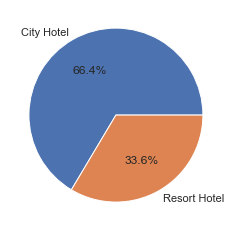

In [10]:
df1 = pd.DataFrame(df_raw['hotel'].value_counts().reset_index())

plt.pie(data=df1,x='hotel',labels='index', autopct='%.1f%%')
plt.show()

In [11]:
df_raw.groupby(['hotel'])['arrival_date_year'].value_counts()

hotel         arrival_date_year
City Hotel    2016                 38140
              2017                 27508
              2015                 13682
Resort Hotel  2016                 18567
              2017                 13179
              2015                  8314
Name: arrival_date_year, dtype: int64

<AxesSubplot:xlabel='hotel', ylabel='count'>

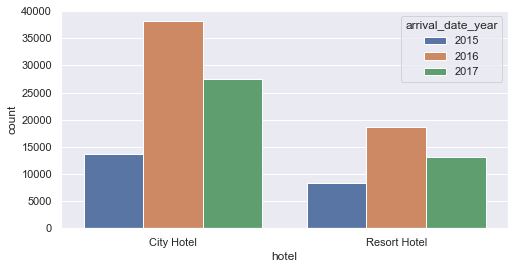

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='hotel',hue='arrival_date_year',data=df_raw,order=('City Hotel','Resort Hotel'))

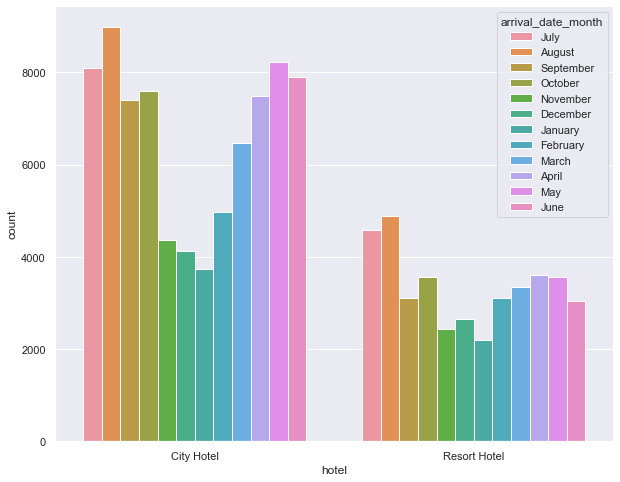

In [13]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='hotel',hue='arrival_date_month',data=df_raw,order=('City Hotel','Resort Hotel'))

In [35]:
df_raw['total arrival']=df_raw['adults']+df_raw['children']+df_raw['babies']

In [34]:
categorical_cols = [col for col in df_raw.columns if df_raw[col].dtype == 'O']
categorical_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [37]:
cat_df = df_raw[categorical_cols]

In [38]:
#splitting the "reservation_status_date" column to three columns year, month and day
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day


/var/folders/cr/vlcn6kbx1xg356fbd0bv0b300000gn/T/ipykernel_22759/3022155319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
/var/folders/cr/vlcn6kbx1xg356fbd0bv0b300000gn/T/ipykernel_22759/3022155319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['year'] = cat_df['reservation_status_date'].dt.year
/var/folders/cr/vlcn6kbx1xg356fbd0bv0b300000gn/T/ipykernel_22759/3022155319.py:4: SettingWithCopyWarning: 
A va

In [226]:
#splitting the "reservation_status_date" column to three columns year, month and day

# perfahps we should exclude reservation_status_date because of data leakage

# df_raw['reservation_status_date'] = pd.to_datetime(df_raw['reservation_status_date'])
# df_raw['year'] = df_raw['reservation_status_date'].dt.year
#df_raw['month'] = df_raw['reservation_status_date'].dt.month
# df_raw['day'] = df_raw['reservation_status_date'].dt.day

In [39]:
cat_df["reservation_status"].unique()
cat_df['reservation_status'].value_counts()

# this status needs to be excluded later

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [40]:
cat_df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

In [41]:
# we delete not needed columns / country might be interessing, but for now we exclude it

notinuse_col =['reservation_status_date','arrival_date_month','country', 'assigned_room_type',
              'reservation_status']

cat_df.drop(notinuse_col, axis = 1, inplace = True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
df_raw.drop(notinuse_col, axis = 1, inplace = True)

In [43]:
print(cat_df.head())

          hotel meal market_segment distribution_channel reserved_room_type  \
0  Resort Hotel   BB         Direct               Direct                  C   
1  Resort Hotel   BB         Direct               Direct                  C   
2  Resort Hotel   BB         Direct               Direct                  A   
3  Resort Hotel   BB      Corporate            Corporate                  A   
4  Resort Hotel   BB      Online TA                TA/TO                  A   

  deposit_type  agent company customer_type  year  month  day  
0   No Deposit      0       0     Transient  2015      7    1  
1   No Deposit      0       0     Transient  2015      7    1  
2   No Deposit      0       0     Transient  2015      7    2  
3   No Deposit  304.0       0     Transient  2015      7    2  
4   No Deposit  240.0       0     Transient  2015      7    3  


In [23]:
for col in cat_df.columns:
    print(f"{col}:\n{cat_df[col].unique()}\n")

hotel:
['Resort Hotel' 'City Hotel']

meal:
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment:
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel:
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type:
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type:
['No Deposit' 'Refundable' 'Non Refund']

agent:
['0' 304.0 240.0 303.0 15.0 241.0 8.0 250.0 115.0 5.0 175.0 134.0 156.0
 243.0 242.0 3.0 105.0 40.0 147.0 306.0 184.0 96.0 2.0 127.0 95.0 146.0
 9.0 177.0 6.0 143.0 244.0 149.0 167.0 300.0 171.0 305.0 67.0 196.0 152.0
 142.0 261.0 104.0 36.0 26.0 29.0 258.0 110.0 71.0 181.0 88.0 251.0 275.0
 69.0 248.0 208.0 256.0 314.0 126.0 281.0 273.0 253.0 185.0 330.0 334.0
 328.0 326.0 321.0 324.0 313.0 38.0 155.0 68.0 335.0 308.0 332.0 94.0
 348.0 310.0 339.0 375.0 66.0 327.0 387.0 298.0 91.0 245.0 385.0 257.0
 393.0 168.0 405.0 249.0 315.0 75.0 128.0 307.0 11.0 436.0 1.0 201.0 183.0
 223.0 368.0 336.0 291.0 4

In [233]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  market_segment  

In [44]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})
cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})


/var/folders/cr/vlcn6kbx1xg356fbd0bv0b300000gn/T/ipykernel_22759/3838653190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
/var/folders/cr/vlcn6kbx1xg356fbd0bv0b300000gn/T/ipykernel_22759/3838653190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
/var/folders/cr/vlcn6kbx1xg356fbd0bv0b300000gn/T/ipykernel_22759/3838653190.py:3: Setti

In [30]:
for col in df_raw.columns:
    print(f"{col}:\n{df_raw[col].unique()}\n")

is_canceled:
[0 1]

lead_time:
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 169 209 238 215 141

In [45]:
df_raw['hotel'] = df_raw['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
df_raw['meal'] = df_raw['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

#cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
#                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

#df_raw['distribution_channel'] = df_raw['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
#                                                                       'GDS': 4})
#df_raw['reserved_room_type'] = df_raw['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
#                                                                   'L': 7, 'B': 8})

#cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

#cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

df_raw['agent'] = df_raw['agent'].astype('int')
df_raw['company'] = df_raw['company'].astype('int')

In [46]:
categorical_cols = [col for col in df_raw.columns if df_raw[col].dtype == 'O']
print(categorical_cols)
#cols=df_raw.select_dtypes(exclude='int').columns.to_list()
df_raw.info()

['market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non

In [47]:
imputer =  SimpleImputer(strategy='constant', fill_value='missing')
df_raw[categorical_cols]=imputer.fit_transform(df_raw[categorical_cols])

In [48]:
df_raw = pd.get_dummies(df_raw)
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  is_repeated_gues

In [28]:
for col in df_raw.columns:
    print(f"{col}:\n{df_raw[col].unique()}\n")

is_canceled:
[0 1]

lead_time:
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 169 209 238 215 141

In [51]:

scaler=StandardScaler()

scale_var = ['lead_time', 'arrival_date_year' , 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights' , 'stays_in_week_nights',
'adults', 'children' , 'babies' , 'meal' , 'is_repeated_guest' , 'previous_cancellations' , 'previous_bookings_not_canceled' , 'booking_changes' ,
 'required_car_parking_spaces' ,'total_of_special_requests' , 'adr',  #,'year' , 'month' , 'day' ,
'agent' , 'company' , 'days_in_waiting_list']

# drop col /// adr , total arrival
#

# df_raw.drop(['total arrival'], axis = 1, inplace = True)


df_raw[scale_var]=scaler.fit_transform(df_raw[scale_var])

df_raw[scale_var].corr()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,required_car_parking_spaces,total_of_special_requests,adr,agent,company,days_in_waiting_list
lead_time,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,0.000349,-0.124410,0.086042,-0.073548,0.000149,-0.116451,-0.095712,-0.063077,-0.012640,-0.086250,0.170084
arrival_date_year,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.065840,0.010341,-0.119822,0.029218,0.030872,-0.013684,0.108531,0.197580,0.056463,0.033882,-0.056497
arrival_date_week_number,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.017381,-0.030131,0.035501,-0.020904,0.005508,0.001920,0.026149,0.075791,-0.018244,-0.032750,0.022933
arrival_date_day_of_month,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.007086,-0.006145,-0.027011,-0.000300,0.010613,0.008683,0.003062,0.030245,0.000202,0.003724,0.022728
stays_in_weekend_nights,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,0.045744,-0.087239,-0.012775,-0.042715,0.063281,-0.018554,0.072671,0.049342,0.161427,-0.079977,-0.054151
stays_in_week_nights,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,0.036742,-0.097245,-0.013992,-0.048743,0.096209,-0.024859,0.068192,0.065237,0.195135,-0.043641,-0.002020
adults,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,0.026327,-0.146426,-0.006738,-0.107983,-0.051673,0.014785,0.122884,0.230641,0.024994,-0.166778,-0.008283
children,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.049794,-0.032858,-0.024729,-0.021072,0.048952,0.056255,0.081736,0.324853,0.050581,-0.042622,-0.033271
babies,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,0.002864,-0.008943,-0.007501,-0.006550,0.083440,0.037383,0.097889,0.029186,0.030266,-0.009459,-0.010621
meal,0.000349,0.065840,-0.017381,-0.007086,0.045744,0.036742,0.026327,-0.049794,0.002864,1.000000,-0.057009,-0.003772,-0.040417,0.024650,-0.038923,0.023136,0.059098,-0.016215,-0.078055,-0.007132


In [246]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
hotel,119390.0,6.644610e-01,0.472181,0.000000,0.000000,1.000000,1.000000,1.000000
is_canceled,119390.0,3.704163e-01,0.482918,0.000000,0.000000,0.000000,1.000000,1.000000
lead_time,119390.0,6.094277e-17,1.000004,-0.973319,-0.804878,-0.327630,0.523930,5.923385
arrival_date_year,119390.0,-8.406294e-14,1.000004,-1.634768,-0.221286,-0.221286,1.192195,1.192195
arrival_date_week_number,119390.0,-1.295034e-16,1.000004,-1.923191,-0.820662,0.061361,0.796381,1.898910
arrival_date_day_of_month,119390.0,2.475800e-17,1.000004,-1.685297,-0.888102,0.022977,0.820172,1.731251
stays_in_weekend_nights,119390.0,1.197430e-16,1.000004,-0.928890,-0.928890,0.072502,1.073895,18.097569
stays_in_week_nights,119390.0,-2.761469e-17,1.000004,-1.310240,-0.786207,-0.262174,0.261858,24.891398
adults,119390.0,3.237585e-17,1.000004,-3.204792,0.247897,0.247897,0.247897,91.744169
children,119390.0,-3.999369e-17,1.000004,-0.260659,-0.260659,-0.260659,-0.260659,24.830072


In [52]:
df_raw.to_csv('/Users/danielambach/Library/CloudStorage/OneDrive-DBUDigitalBusinessUniversityofAppliedSciencesGmbH/DBU/07_Machine Learning/20 Daten/out.csv', index = False, header=True)